In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from datetime import datetime
from pathlib import Path
import pickle
import sys

import matplotlib.pyplot as plt
from pymatgen.core.structure import Molecule

Custom plotting code... ignore this if you don't know what it is, it should gracefully do nothing if you don't have the `MPLAdjutant` class. 

In [3]:
sys.path.append(str(Path.home() / Path("local")))
class NullClass:
    def do_nothing(*args, **kwargs):
        pass
    def add_colorbar(self, im, **kwargs):
        return plt.colorbar(im)
    def __getattr__(self, _):
        return self.do_nothing
try:
    from mpl_utils import MPLAdjutant
    adj = MPLAdjutant()
    adj.set_defaults()
except ImportError:
    adj = NullClass()

Append the `home` path of this project.

In [4]:
sys.path.append(str(Path.cwd().parent))

# Load the data

Let's just focus on the N database for now.

In [5]:
data = pickle.load(open("../data/qm9/ml_ready/XANES-220625-ACSF-N-MAX_TRAINING_ABSORBERS-2.pkl", "rb"))

# Create the ML database

Construct a ML `Data` object. To do so we get a random validation split, then instantiate the `Data` object.

In [6]:
import torch
from torch.utils.data import random_split

/home/mcarbone/miniconda3/envs/py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from xas_nne.ml import Ensemble

In [24]:
ensemble = Ensemble.from_random_architectures(root="Estimators/test", n_estimators=10, seed=123)

Global seed set to 123


Renamed existing root Estimators/test to Estimators/test-220626-112553


In [25]:
ensemble.train(
    training_data=data["train"],
    ensemble_index=0,
    estimator_index=0,
    epochs=100,
)

Auto select gpus: [0]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                     | Params
-------------------------------------------------------
0 | _model    | FeedForwardNeuralNetwork | 292 K 
1 | criterion | L1Loss                   | 0     
-------------------------------------------------------
292 K     Trainable params
0         Non-trainable params
292 K     Total params
1.172     Total estimated model params size (MB)


Training estimator 0
Initializing from random architecture: [155, 241, 223, 228, 228, 223, 200]
Initialized model from random architecture using arguments {'min_layers': 4, 'max_layers': 8, 'min_neurons_per_layer': 160, 'max_neurons_per_layer': 300, 'dropout': 0.0, 'batch_norm': True, 'activation': 'leaky_relu', 'last_activation': 'relu', 'criterion': 'mae', 'last_batch_norm': False}
Root set to Estimators/test/000000/000000
Setting optimizer family: {'lr': 0.01, 'patience': 10, 'min_lr': 1e-07, 'factor': 0.95, 'monitor': 'val_loss'}
Setting trainer with cuda=True
Epoch 00020
	lr: 1.000e-02
	cv loss 8.836e-02
	tr loss 8.700e-02 | 0.01 m
Epoch 00040
	lr: 1.000e-02
	cv loss 7.332e-02
	tr loss 6.992e-02 | 0.01 m
Epoch 00060
	lr: 1.000e-02
	cv loss 6.895e-02
	tr loss 6.246e-02 | 0.01 m
Epoch 00080
	lr: 9.500e-03
	cv loss 6.854e-02
	tr loss 6.509e-02 | 0.01 m
Epoch 00100
	lr: 9.025e-03
	cv loss 6.523e-02
	tr loss 6.048e-02 | 0.01 m


In [26]:
est = ensemble._estimators[0]

In [27]:
gt = data["test"]["y"]

In [28]:
pred = est.predict(data["test"]["x"])

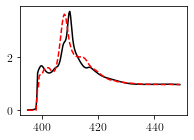

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

ii = -18
ax.plot(data["train"]["grid"], gt[ii], 'k-')
ax.plot(data["train"]["grid"], pred[ii], 'r--')

In [81]:
est.best_model

LightningMultiLayerPerceptron(
  (_model): FeedForwardNeuralNetwork(
    (_layers): Sequential(
      (0): FeedforwardLayer(
        (_layers): Sequential(
          (0): Linear(in_features=155, out_features=241, bias=True)
          (1): LeakyReLU(negative_slope=0.01)
          (2): BatchNorm1d(241, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): FeedforwardLayer(
        (_layers): Sequential(
          (0): Linear(in_features=241, out_features=223, bias=True)
          (1): LeakyReLU(negative_slope=0.01)
          (2): BatchNorm1d(223, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): FeedforwardLayer(
        (_layers): Sequential(
          (0): Linear(in_features=223, out_features=228, bias=True)
          (1): LeakyReLU(negative_slope=0.01)
          (2): BatchNorm1d(228, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (3): FeedforwardLayer(
        (_l